In [63]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

In [64]:
dta = sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0  represents not 
dta['affair'] = (dta.affairs > 0).astype(int) 
y, X = dmatrices('affair ~ C(rate_marriage) + age + yrs_married + children + religious + C(educ) + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X = X.rename(columns =  { 'C(occupation)[T.2.0]':'occ_2',
                         'C(occupation)[T.3.0]':'occ_3', 
                         'C(occupation)[T.4.0]':'occ_4', 
                         'C(occupation)[T.5.0]':'occ_5', 
                         'C(occupation)[T.6.0]':'occ_6', 
                         'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                         'C(occupation_husb)[T.3.0]':'occ_husb_3', 
                         'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                         'C(occupation_husb)[T.5.0]':'occ_husb_5', 
                         'C(occupation_husb)[T.6.0]':'occ_husb_6',
                        'C(rate_marriage)[T.2.0]': 'rate_marriage_2',
                        'C(rate_marriage)[T.3.0]': 'rate_marriage_3',
                        'C(rate_marriage)[T.4.0]': 'rate_marriage_4',
                        'C(rate_marriage)[T.5.0]': 'rate_marriage_5',
                        'C(educ)[T.12.0]': 'edu_12',
                        'C(educ)[T.14.0]': 'edu_14',
                        'C(educ)[T.16.0]': 'edu_16',
                        'C(educ)[T.17.0]': 'edu_17',
                        'C(educ)[T.20.0]': 'edu_20'}) 
y = np.ravel(y)

In [65]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [66]:
X.head()

,Intercept,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5,edu_12,edu_14,edu_16,edu_17,edu_20,...,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children,religious
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,32.0,9.0,3.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,13.0,3.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,22.0,2.5,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,37.0,16.5,4.0,3.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,9.0,1.0,1.0


C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

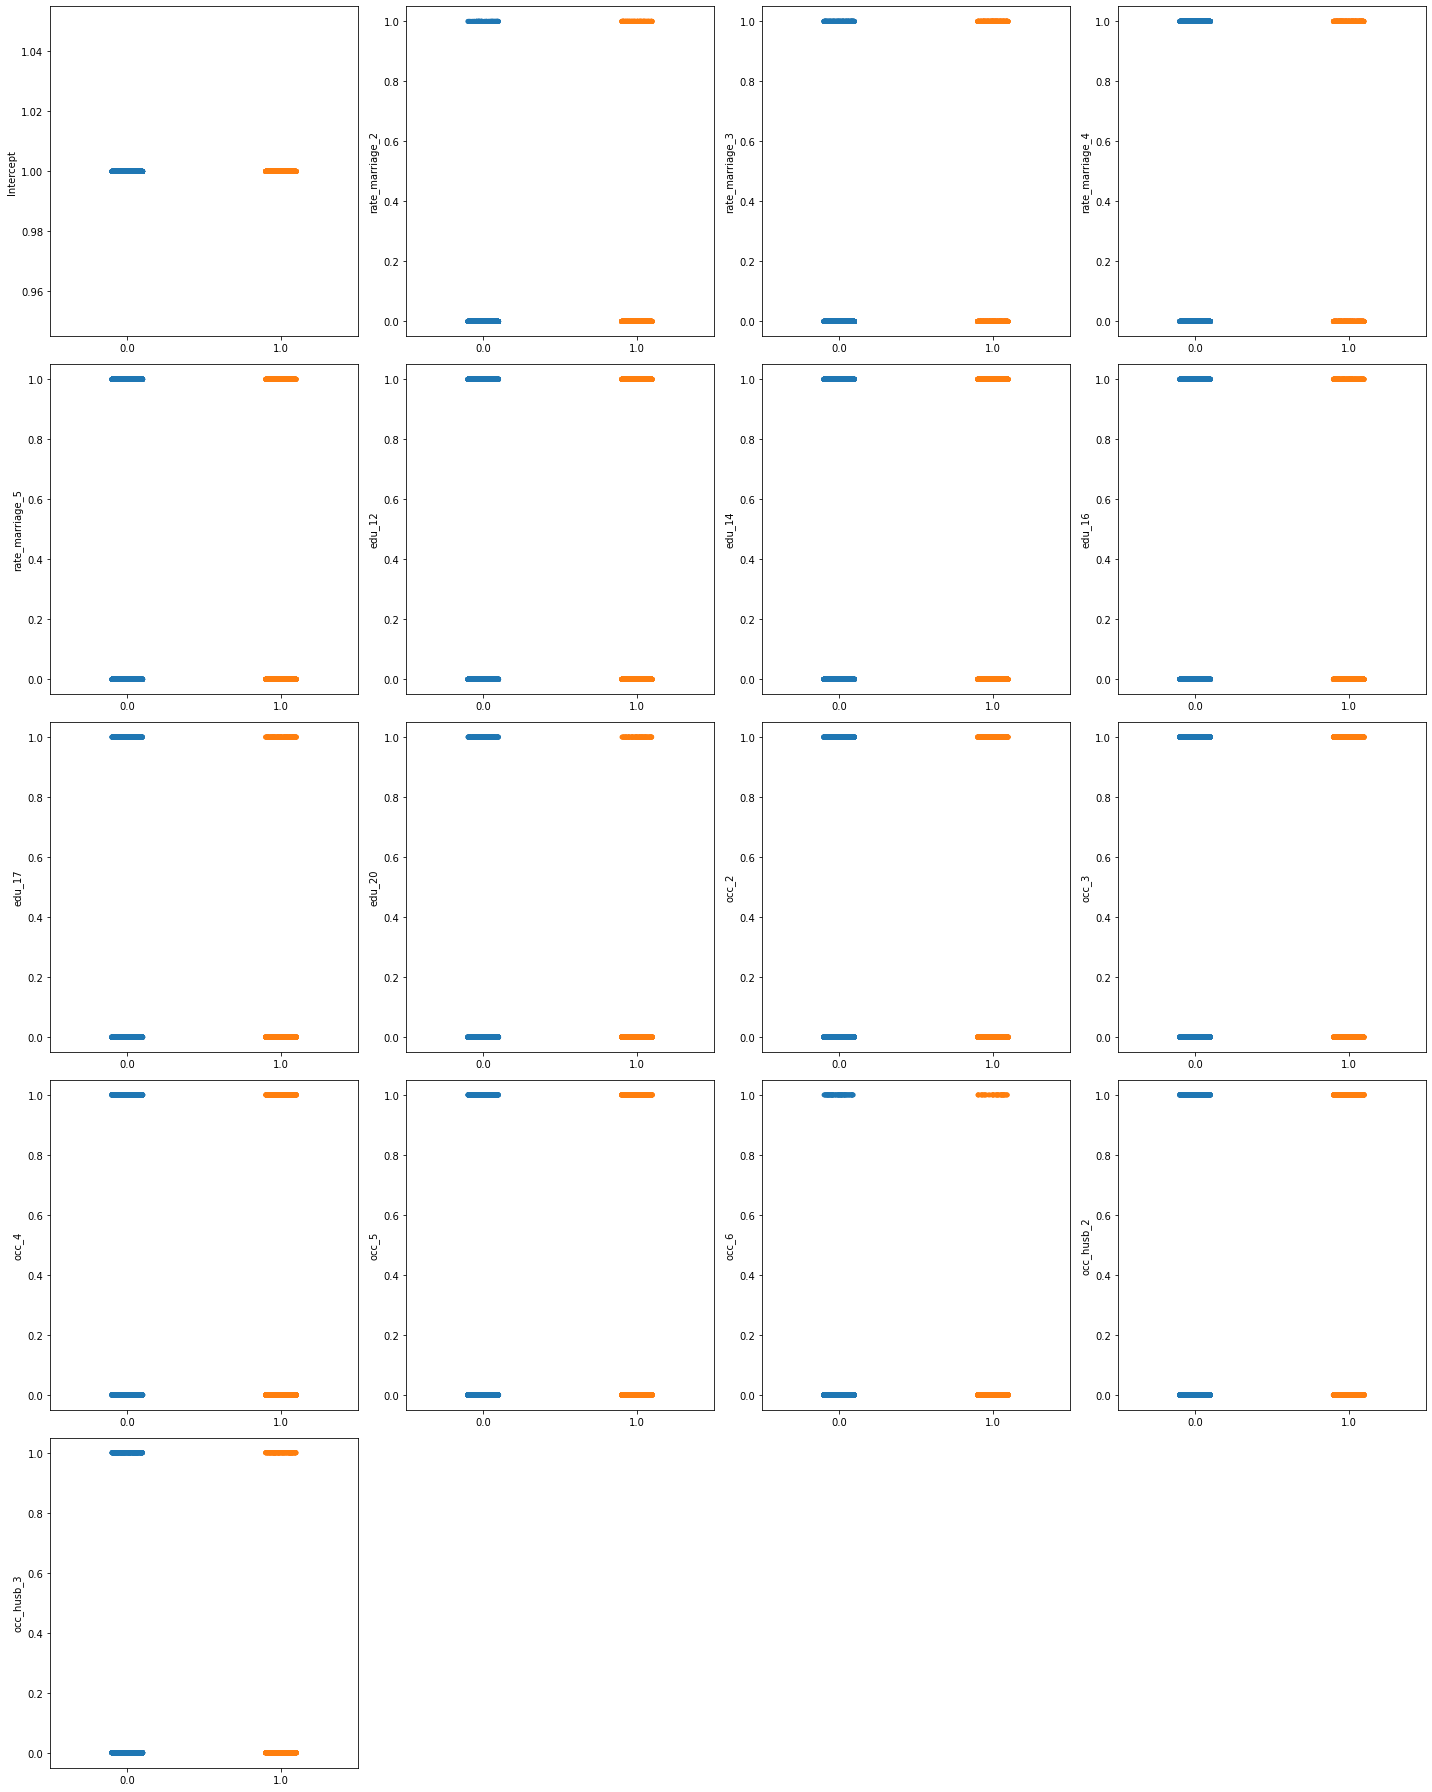

In [67]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=17 :
        ax = plt.subplot(5,4,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

In [68]:
X.describe()

,Intercept,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5,edu_12,edu_14,edu_16,edu_17,edu_20,...,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children,religious
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,...,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.054665,0.155985,0.352183,0.421615,0.327364,0.357681,0.175463,0.080113,0.051838,...,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,29.082862,9.009425,1.396874,2.426170
std,0.0,0.227344,0.362870,0.477688,0.493856,0.469288,0.479355,0.380393,0.271490,0.221717,...,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,6.847882,7.280120,1.433471,0.878369
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.500000,0.500000,0.000000,1.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2.500000,0.000000,2.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,6.000000,1.000000,2.000000
75%,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,32.000000,16.500000,2.000000,3.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,23.000000,5.500000,4.000000


In [69]:
X.isna().sum()

Intercept          0
rate_marriage_2    0
rate_marriage_3    0
rate_marriage_4    0
rate_marriage_5    0
edu_12             0
edu_14             0
edu_16             0
edu_17             0
edu_20             0
occ_2              0
occ_3              0
occ_4              0
occ_5              0
occ_6              0
occ_husb_2         0
occ_husb_3         0
occ_husb_4         0
occ_husb_5         0
occ_husb_6         0
age                0
yrs_married        0
children           0
religious          0
dtype: int64

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\

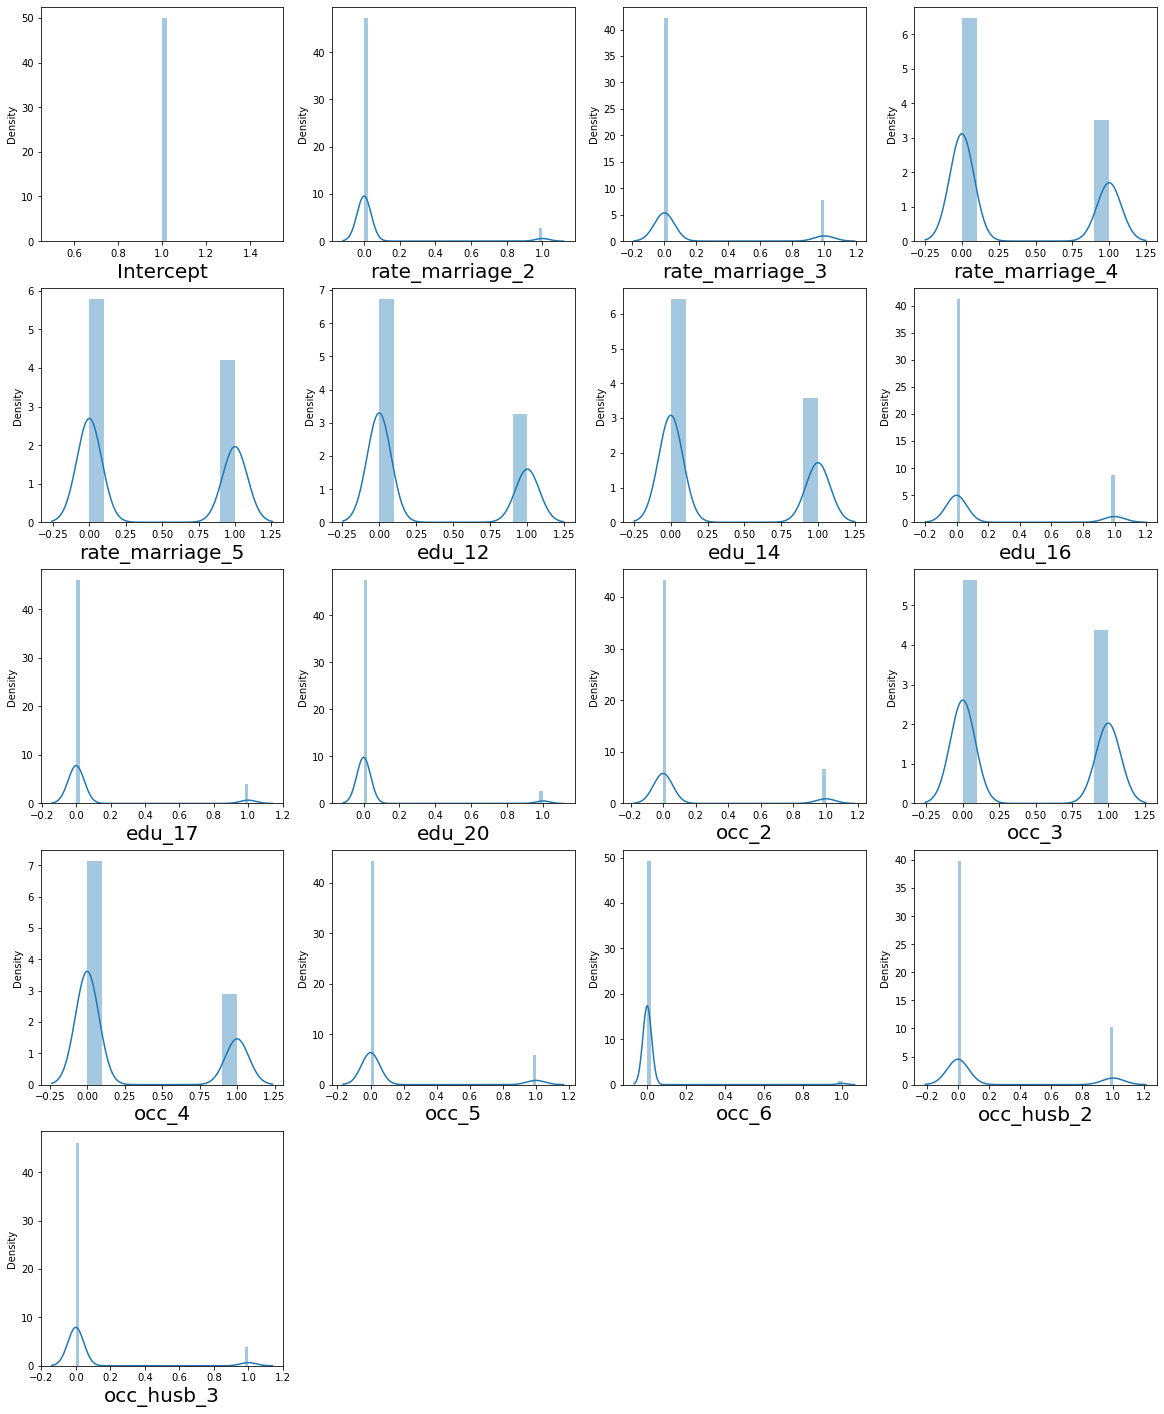

In [70]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=17 :     # as there are 9 columns in the data
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [72]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = log_reg.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7167085427135679

In [75]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[951, 115],
       [336, 190]], dtype=int64)

In [76]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [77]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7167085427135679

In [78]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8921200750469043

In [79]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7389277389277389

In [80]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.808329791755206

In [81]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6266684025424635

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

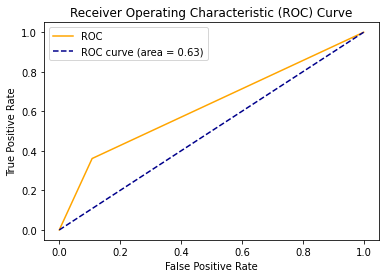

In [83]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()